<h1 style="color:Black; text-align:center; font-size:3em;">The Battle of Neighborhoods</h1>
<h3 style="color:green; text-align:center; font-size:2em;">Exploring Madrid, Spain<h3>
<h4 style="color:black; text-align:center; font-size:1.5em;">Scraping data, Creating dataframe, Analizing data, Clustering<h4>

## Table of contents

1. Build a dataframe to use in a clustering project with Foursquare location data
2. Assign the latitude and longitude coordinates for each Ward/Neigborhood in the previous dataframe
3. Explore and cluster the Ward/Neighborhood


### Build a dataframe to use in a clustering project with Foursquare location data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

Building a dataframe from data scraped from official web of the City of Madrid

Let´s create a dataframe from the raw dataset. Sources:
- http://opendata.esri.es/
- http://www-2.munimadrid.es/CSE6/control/menuCSE?filtro=NS&tablaSerie=SERIES
- https://es.wikipedia.org/wiki/Anexo:Distritos_de_Madrid
- http://distritopostal.es/madrid/madrid

Readind the dataset

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.

client_68de1a9002bc43e3bb2b02403a39d713 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Private',
    ibm_auth_endpoint="Private",
    config=Config(signature_version='oauth'),
    endpoint_url='Private')

body = client_jzjbjbssvxanbfskfwehfihwfjb7347t.get_object(Bucket='Private',Key='Wards-Pob.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Raw data: Population of Madrid by Ward
df_rawPopWard = pd.read_csv(body, header = 0, encoding = 'unicode_escape')
df_rawPopWard.head()

,distCod,District,distCod-wardCod,Ward,wardCod,distSectionCod,sectionCod,Age,SpanishMen,SpanishWomen,ForeignMen,ForeignWomen,ageRange,TotalSpanish,TotalForeign
0,1,CENTRO,101,PALACIO,1,1007,7,1,1.0,3.0,NaN,NaN,0-15,4,0
1,1,CENTRO,101,PALACIO,1,1007,7,2,4.0,2.0,NaN,NaN,0-15,6,0
2,1,CENTRO,101,PALACIO,1,1007,7,3,1.0,6.0,NaN,NaN,0-15,7,0
3,1,CENTRO,101,PALACIO,1,1007,7,4,3.0,4.0,NaN,NaN,0-15,7,0
4,1,CENTRO,101,PALACIO,1,1007,7,5,1.0,2.0,NaN,NaN,0-15,3,0


Verifying types

In [291]:
df_rawPopWard.dtypes

distCod            object
District           object
distCod-wardCod    object
Ward               object
wardCod            object
distSectionCod     object
sectionCod         object
Age                 int64
SpanishMen          int64
SpanishWomen        int64
ForeignMen          int64
ForeignWomen        int64
ageRange           object
TotalSpanish        int64
TotalForeign        int64
TotalCitizen        int64
dtype: object

Replacing Nan with 0 in columns of type Integer

In [4]:

df_rawPopWard.replace(np.nan, 0, inplace = True)
df_rawPopWard.head()

,distCod,District,distCod-wardCod,Ward,wardCod,distSectionCod,sectionCod,Age,SpanishMen,SpanishWomen,ForeignMen,ForeignWomen,ageRange,TotalSpanish,TotalForeign
0,1,CENTRO,101,PALACIO,1,1007,7,1,1.0,3.0,0.0,0.0,0-15,4,0
1,1,CENTRO,101,PALACIO,1,1007,7,2,4.0,2.0,0.0,0.0,0-15,6,0
2,1,CENTRO,101,PALACIO,1,1007,7,3,1.0,6.0,0.0,0.0,0-15,7,0
3,1,CENTRO,101,PALACIO,1,1007,7,4,3.0,4.0,0.0,0.0,0-15,7,0
4,1,CENTRO,101,PALACIO,1,1007,7,5,1.0,2.0,0.0,0.0,0-15,3,0


Adding a column with the total population of the City of Madrid (Spanish + Foreign citizens)

In [5]:
df_rawPopWard['TotalCitizen'] = df_rawPopWard['TotalSpanish'] + df_rawPopWard['TotalForeign']
print('This is the size of the dataset: {}'.format(df_rawPopWard.shape))
df_rawPopWard.head()

This is the size of the dataset: (237467, 16)


,distCod,District,distCod-wardCod,Ward,wardCod,distSectionCod,sectionCod,Age,SpanishMen,SpanishWomen,ForeignMen,ForeignWomen,ageRange,TotalSpanish,TotalForeign,TotalCitizen
0,1,CENTRO,101,PALACIO,1,1007,7,1,1.0,3.0,0.0,0.0,0-15,4,0,4
1,1,CENTRO,101,PALACIO,1,1007,7,2,4.0,2.0,0.0,0.0,0-15,6,0,6
2,1,CENTRO,101,PALACIO,1,1007,7,3,1.0,6.0,0.0,0.0,0-15,7,0,7
3,1,CENTRO,101,PALACIO,1,1007,7,4,3.0,4.0,0.0,0.0,0-15,7,0,7
4,1,CENTRO,101,PALACIO,1,1007,7,5,1.0,2.0,0.0,0.0,0-15,3,0,3


Changing types

In [7]:
# Changing types

df_rawPopWard[["distCod", "distCod-wardCod", "wardCod", "Ward", "distSectionCod", "sectionCod"]] = df_rawPopWard[["distCod", "distCod-wardCod", "wardCod", "Ward", "distSectionCod", "sectionCod"]].astype("str")
df_rawPopWard[["SpanishMen", "SpanishWomen", "ForeignMen", "ForeignWomen"]] = df_rawPopWard[["SpanishMen", "SpanishWomen", "ForeignMen", "ForeignWomen"]].astype("int")

df_rawPopWard.dtypes

distCod            object
District           object
distCod-wardCod    object
Ward               object
wardCod            object
distSectionCod     object
sectionCod         object
Age                 int64
SpanishMen          int64
SpanishWomen        int64
ForeignMen          int64
ForeignWomen        int64
ageRange           object
TotalSpanish        int64
TotalForeign        int64
TotalCitizen        int64
dtype: object

Some statistics

In [8]:
df_rawPopWard.describe()

,Age,SpanishMen,SpanishWomen,ForeignMen,ForeignWomen,TotalSpanish,TotalForeign,TotalCitizen
count,237467.000000,237467.000000,237467.000000,237467.000000,237467.000000,237467.000000,237467.000000,237467.000000
mean,48.239726,5.559935,6.351181,0.962100,1.118488,11.911116,2.080588,13.991704
std,28.241844,4.881765,5.046040,1.657811,1.782907,9.244675,3.094937,10.460275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,2.000000,3.000000,0.000000,0.000000,6.000000,0.000000,7.000000
50%,48.000000,5.000000,5.000000,0.000000,0.000000,10.000000,1.000000,12.000000
75%,72.000000,7.000000,8.000000,1.000000,2.000000,15.000000,3.000000,18.000000
max,115.000000,85.000000,87.000000,58.000000,55.000000,166.000000,98.000000,186.000000


In [10]:
df_rawPopWard.describe(include=['object'])

,distCod,District,distCod-wardCod,Ward,wardCod,distSectionCod,sectionCod,ageRange
count,237467,237467,237467,237467,237467,237467,237467,237467
unique,21,21,131,131,9,2443,221,7
top,10,LATINA,1004,ALUCHE,4,11123,6,32-47
freq,19471,19471,5748,5748,45895,106,2054,39088


The territorial division of the City of Madrid

In [11]:
districts = df_rawPopWard['District'].unique().size
wards = df_rawPopWard['Ward'].unique().size
print('The City of Madrid has {} Wards, grouped in {} Districts'.format(wards, districts))

The City of Madrid has 131 Wards, grouped in 21 Districts


The population of the City of Madrid

In [12]:
tot_sp_pop = df_rawPopWard["TotalSpanish"].astype("int").sum(axis=0)
tot_for_pop = df_rawPopWard["TotalForeign"].astype("int").sum(axis=0)
tot_pop_mad = tot_sp_pop + tot_for_pop

print('The total population of Madrid is {} inhabitants, {} Spanish citizens and {} foreign citizens'.format(tot_sp_pop + tot_for_pop, tot_sp_pop, tot_for_pop))

The total population of Madrid is 3322568 inhabitants, 2828497 Spanish citizens and 494071 foreign citizens


The population of the City of Madrid, by District

In [13]:
df_slice = df_rawPopWard[["District", "ageRange", "TotalCitizen"]]
df_group_age = df_slice.groupby(["District", "ageRange"], as_index=False).sum()
df_group_pop = df_slice.groupby(["District"], as_index=False).sum()
df_group_pop = df_group_pop.sort_values('TotalCitizen',ascending=True)
df_group_pop.head()

,District,TotalCitizen
1,BARAJAS,49966
18,VICALVARO,73800
11,MORATALAZ,95761
19,VILLA DE VALLECAS,113687
13,RETIRO,120437


Importing other dependencies

In [14]:
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import plotly as px
mpl.style.use('ggplot')

Exploring population, by District

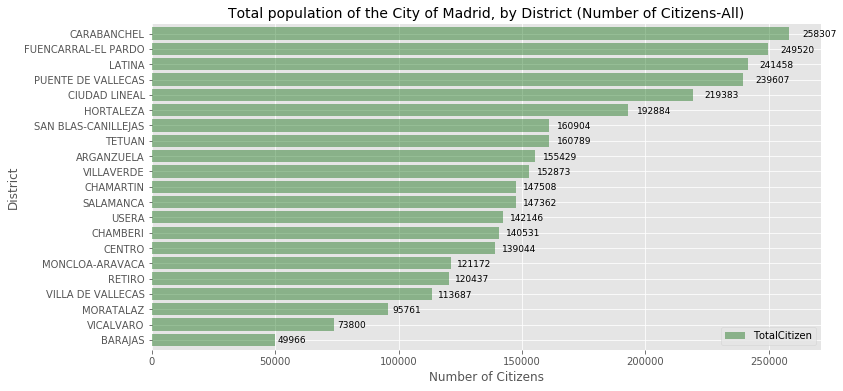

In [15]:
df_barh = df_group_pop[:]
df_barh.set_index('District', inplace = True)
df_barh = df_barh.sort_values(by='TotalCitizen', ascending=True)

ax = df_barh.plot(
    kind='barh', 
    figsize=(12, 6),
    width=0.8,
    color='darkgreen',
    alpha=0.4,
    edgecolor=None
)

ax.set_title('Total population of the City of Madrid, by District (Number of Citizens-All)', fontsize=14)
plt.ylabel('District')
plt.xlabel('Number of Citizens')
ax.legend().set_visible(True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.get_yaxis().set_visible(True)
ax.get_xaxis().set_visible(True)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:}'.format(width),
                (p.get_x() + 1.02*width,
                 p.get_y() + 0.25*height),
                 ha = 'left',
                 color='black',
                 fontsize=9)

_Carabanchel It is the district with the largest number of inhabitants, followed by Fuencarral-El Pardo_

Exploring population, by District, by Age

In [16]:
#dist_age = df_rawPopWard.groupby(['District','ageRange'], axis=0).sum()

df_dist_ager = df_rawPopWard[["District", "ageRange", "TotalCitizen"]]
df_dist_ager = df_dist_ager.groupby(["District", "ageRange"], as_index=False).sum()
df_pivot_age = df_dist_ager.pivot(index="District", columns="ageRange")
df_pivot_age

TotalCitizen                                        
ageRange                    0-15  16-31  32-47  48-63  64-79  80-95   95
District                                                                
ARGANZUELA                 19052  26278  40912  36784  22321   9612  470
BARAJAS                     9016   7525  13136  10906   7134   2157   92
CARABANCHEL                37609  47087  65211  56767  33097  17954  582
CENTRO                     10881  28709  45280  30657  16089   7071  357
CHAMARTIN                  20238  25044  34333  31553  24024  11722  594
CHAMBERI                   14940  27140  33434  29075  23582  11650  710
CIUDAD LINEAL              27496  38833  49975  50608  33257  18578  636
FUENCARRAL-EL PARDO        44390  37547  63081  49560  39326  15122  494
HORTALEZA                  34003  30107  49273  41788  26672  10682  359
LATINA                     29518  41017  55663  53351  40028  21238  643
MONCLOA-ARAVACA            17293  22095  26247  27418  18826   8869  424
MORATALAZ                  11065  16599  18636  23347  16177   9710  227
PUENTE DE VALLECAS         32897  47632  56976  57129  28469  16119  385
RETIRO                     14869  18875  27169  26538  22441  10083  462
SALAMANCA                  16421  28201  33875  31636  24180  12377  672
SAN BLAS-CANILLEJAS        24178  28971  37000  40931  18595  10934  295
TETUAN                     18436  32490  42973  34228  20988  11208  466
USERA                      21739  27233  35860  31984  15698   9340  292
VICALVARO                  13351  12906  18223  18137   7546   3572   65
VILLA DE VALLECAS          21655  19250  35220  22206  11140   4097  119
VILLAVERDE                 24936  28695  37191  34537  17542   9792  180

Most of the population is between 30 and 60 years old

In [17]:
ages = df_dist_ager.groupby(["ageRange"], as_index=False).sum()
ages

,ageRange,TotalCitizen
0,0-15,463983
1,16-31,592234
2,32-47,819668
3,48-63,739140
4,64-79,467132
5,80-95,231887
6,95,8524


Due to the requirement, we will analyze the age ranges of: 32 - 47 and 48 - 63 (Districts with the largest population of citizens between 30 and 60 years)

In [18]:
df_targetPop = df_rawPopWard[(df_rawPopWard['Age'] >=30) & (df_rawPopWard['Age'] <=60)]
df_targetPop = df_targetPop[['distCod', 'District', 'Ward', 'TotalCitizen']]
df_targetPop.head()

,distCod,District,Ward,TotalCitizen
29,1,CENTRO,PALACIO,16
30,1,CENTRO,PALACIO,16
31,1,CENTRO,PALACIO,12
32,1,CENTRO,PALACIO,10
33,1,CENTRO,PALACIO,11


Explorig Districts, by age between 30 and 60 years old

In [19]:
df_targetPop = df_targetPop[["District", "TotalCitizen"]]
df_targetPop = df_targetPop.groupby(["District"], as_index=False).sum()
print('There are {} Citizens with age between 30 to 60 years old in the City of Madrid'.format(sum(df_targetPop['TotalCitizen'])))
df_targetPop

There are 1535408 Citizens with age between 30 to 60 years old in the City of Madrid


,District,TotalCitizen
0,ARGANZUELA,75950
1,BARAJAS,23571
2,CARABANCHEL,120794
3,CENTRO,77578
4,CHAMARTIN,64748
5,CHAMBERI,62103
6,CIUDAD LINEAL,98271
7,FUENCARRAL-EL PARDO,110079
8,HORTALEZA,89181
9,LATINA,106683


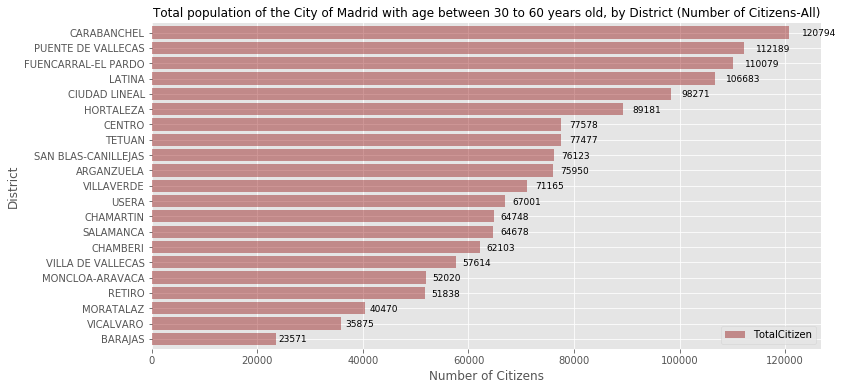

In [20]:
df_barh_target = df_targetPop[:]
df_barh_target.set_index('District', inplace = True)
df_barh_target = df_barh_target.sort_values(by='TotalCitizen', ascending=True)

ax = df_barh_target.plot(
    kind='barh', 
    figsize=(12, 6),
    width=0.8,
    color='darkred',
    alpha=0.4,
    edgecolor=None
)

ax.set_title('Total population of the City of Madrid with age between 30 to 60 years old, by District (Number of Citizens-All)', fontsize=12)
plt.ylabel('District')
plt.xlabel('Number of Citizens')
ax.legend().set_visible(True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.get_yaxis().set_visible(True)
ax.get_xaxis().set_visible(True)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:}'.format(width),
                (p.get_x() + 1.02*width,
                 p.get_y() + 0.25*height),
                 ha = 'left',
                 color='black',
                 fontsize=9)

_The distribution of this population (age 30 -60) is similar to the total_

### 3. Explore and cluster Wards of the City of Madrid

In [44]:
wards = df_rawPopWard[["Ward"]]
wards = wards.groupby(["Ward"], as_index=False).sum()
wards = wards.set_index('Ward', inplace = True)
wards

In [46]:
print(wards)

None


<h4 style="color:Black; text-align:left">Importing other dependencies that we will need</h4>

In [22]:
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

Using geopy library to get the **latitude** and **longitude** values of the **City of Madrid**

Due to the requirement, we will focus on the **Centro** district

In [115]:
address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="Madrid")
location = geolocator.geocode(address)
lat_Tor = location.latitude
long_Tor = location.longitude
print('The geograpical coordinate of the City of Madrid are {}, {}.'.format(lat_Tor, long_Tor))

The geograpical coordinate of the City of Madrid are 40.4167047, -3.7035825.


<h4 style="color:Blue; text-align:left">Creating a map of The City of Madrid</h4>

In [58]:
map_MAD = folium.Map(location=[lat_MAD, long_MAD], zoom_start=18)

lat_MAD = 40.4167047
long_MAD = -3.7035825
label = '{}, {}'.format("Centro", "Centro")
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
[lat_MAD, long_MAD],
radius=5,
popup=label,
color='blue',
fill=True,
fill_color='#3186cc',
fill_opacity=0.7,
parse_html=False).add_to(map_MAD)  
    
map_MAD

Mapping Malasaña

In [116]:
map_mala = folium.Map(location=[lat_MAD, long_MAD], zoom_start=18)

lat_mala = 40.4267079
long_mala = -3.7042311
label = '{}, {}'.format("Centro", "Malasaña")
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
[lat_mala, long_mala],
radius=5,
popup=label,
color='blue',
fill=True,
fill_color='#3186cc',
fill_opacity=0.7,
parse_html=False).add_to(map_mala)  
    
map_mala

***
<h4 style="color:Blue; text-align:left">Mapping the ward Malasaña in the City of Madrid, Centro</h4>

#### Foursquare: Credentials and Version

In [133]:
CLIENT_ID = 'Private' # your Foursquare ID
CLIENT_SECRET = 'Private' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Private
CLIENT_SECRET:Private


<h4 style="color:Blue; text-align:left">Exploring and Analyzing Malasaña</h4>

Getting the longitude and latitude values

In [64]:
ward_latitude = 40.4267079
ward_longitude = -3.7042311
ward_name = "Malasaña"

print('Latitude and longitude values of {} are {}, {}.'.format(ward_name, 
                                                               ward_latitude, 
                                                               ward_longitude))

Latitude and longitude values of Malasaña are 40.4267079, -3.7042311.


<h4 style="color:Black; text-align:left">Getting the top 500 venues that are in Chinatown within a radius of 1000 meters</h4>

In [76]:
LIMIT = 500 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ward_latitude, 
    ward_longitude, 
    radius,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=JZTXGWTYWRQEKVOQOMNITWKRJS0O1OX1ZYJ2TNLQURWTESWY&client_secret=ULVKBNSOU0N1JJ2LOAXHOZLETVMBPBQFI1DYOQ2KBL22YPK5&v=20180605&ll=40.4267079,-3.7042311&radius=1000&limit=500'

Requesting, let´s examine the resutls

In [77]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5db3a176cc7d410032bc8f1b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Universidad',
  'headerFullLocation': 'Universidad, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 236,
  'suggestedBounds': {'ne': {'lat': 40.43570790900001,
    'lng': -3.69243028703403},
   'sw': {'lat': 40.417707890999985, 'lng': -3.7160319129659696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e19907752b123a586e15197',
       'name': 'Toma Café',
       'location': {'address': 'C. Palma, 49',
        'lat': 40.42650984196803,
        'lng': -3.7059470889382538,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.42650

#### Defining the **get_category_type** function, the same used in the Foursquare lab

This Function extracts the category of the venue.

In [117]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let´s clean the json and structure it into a pandas dataframe.

In [118]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# Filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# Filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# Clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Toma Café,Coffee Shop,40.426510,-3.705947
1,Movilonia.com,Mobile Phone Shop,40.426437,-3.705404
2,Casa Macareno,Bar,40.425879,-3.704782
3,La Colmada,Restaurant,40.425476,-3.704364
4,Chopper Monster,Clothing Store,40.425846,-3.701820


The number of venues that were returned by Foursquare

In [80]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


<h4 style="color:Black; text-align:left">Exploring Malasaña</h4>

Writing the code to run the above function on each neighbourhood and create a new dataframe called downtown_venues.

In [86]:
print('The shape is: {}' .format(nearby_venues.shape))
nearby_venues.head()

The shape is: (100, 4)


,name,categories,lat,lng
0,Toma Café,Coffee Shop,40.426510,-3.705947
1,Movilonia.com,Mobile Phone Shop,40.426437,-3.705404
2,Casa Macareno,Bar,40.425879,-3.704782
3,La Colmada,Restaurant,40.425476,-3.704364
4,Chopper Monster,Clothing Store,40.425846,-3.701820


Checking the number of **venues** returned from Malasaña

Finding out how many unique categories can be curated from all the returned venues

In [107]:
print('There are {} uniques categories.'.format(len(nearby_venues['categories'].unique())))

There are 55 uniques categories.


<h4 style="color:Black; text-align:left">Analyzing Malasaña</h4>

In [120]:
# one hot encoding
mala_onehot = pd.get_dummies(nearby_venues[['categories']], prefix="", prefix_sep="")

fixed_columns = [mala_onehot.columns[-1]] + list(mala_onehot.columns[:-1])
mala_onehot = mala_onehot[fixed_columns]

mala_onehot.head()

,Wine Bar,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Bookstore,...,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Spanish Restaurant,Tapas Restaurant,Tea Room,Theater,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the shape of the previous dataframe?

In [106]:
print('The shape is: {}' .format(mala_onehot.shape))

The shape is: (100, 55)


In [112]:
nearby_venues

,name,categories,lat,lng
0,Toma Café,Coffee Shop,40.426510,-3.705947
1,Movilonia.com,Mobile Phone Shop,40.426437,-3.705404
2,Casa Macareno,Bar,40.425879,-3.704782
3,La Colmada,Restaurant,40.425476,-3.704364
4,Chopper Monster,Clothing Store,40.425846,-3.701820
5,Tres Rosas Amarillas,Bookstore,40.425265,-3.702987
6,The Stuyck Co,Beer Bar,40.426491,-3.701695
7,Ojalá,Restaurant,40.425391,-3.704016
8,Eric Vökel Boutique Apartments,Hotel,40.426291,-3.706963
9,Lolina Vintage Café,Lounge,40.425107,-3.702912


In [131]:
categories_grouped = nearby_venues.groupby('categories').count().reset_index()
categories_grouped = categories_grouped[['categories','name']]
categories_grouped.head()

,categories,name
0,Arepa Restaurant,1
1,Argentinian Restaurant,1
2,Art Gallery,1
3,Asian Restaurant,1
4,Bakery,1


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['Latitude'], nearby_venues['Longitude'], nearby_venues['name'], nearby_venues['categories']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters